<a href="https://colab.research.google.com/github/Rohithtechis/Kaggle_VG_sales_pred/blob/main/Video_game_sales_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [ ]:
data=pd.read_csv('/content/vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
data.shape

(16598, 11)

In [ ]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
data.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
data=data.dropna()


In [ ]:
data.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
data_cat=data.select_dtypes(include='object')
data_cat.head()

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#en=LabelEncoder()
#data['Name']=en.fit_transform(data['Name'])
#data['Platform']=en.fit_transform(data['Platform'])
#data['Genre']=en.fit_transform(data['Genre'])
#data['Publisher']=en.fit_transform(data['Publisher'])


In [ ]:
from sklearn.preprocessing import OneHotEncoder
en = OneHotEncoder()
data['Name']=en.fit_transform(data['Name'].values.reshape(-1,1)).toarray()
data['Platform']=en.fit_transform(data['Platform'].values.reshape(-1,1)).toarray()
data['Genre']=en.fit_transform(data['Genre'].values.reshape(-1,1)).toarray()
data['Publisher']=en.fit_transform(data['Publisher'].values.reshape(-1,1)).toarray()

In [ ]:
data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,0.0,0.0,2002.0,0.0,0.0,0.01,0.00,0.0,0.0,0.01
16594,16597,0.0,0.0,2003.0,0.0,0.0,0.01,0.00,0.0,0.0,0.01
16595,16598,0.0,0.0,2008.0,0.0,0.0,0.00,0.00,0.0,0.0,0.01
16596,16599,0.0,0.0,2010.0,0.0,0.0,0.00,0.01,0.0,0.0,0.01
16597,16600,0.0,0.0,2003.0,0.0,0.0,0.01,0.00,0.0,0.0,0.01


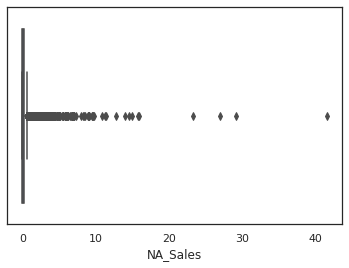

In [ ]:
sns.boxplot(data['NA_Sales'])
plt.show()

In [ ]:
Q1 = np.percentile(data['NA_Sales'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['NA_Sales'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['NA_Sales'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -0.36
upper limit: 0.6


In [ ]:
data=data[data.NA_Sales<up_lim]
data=data[data.NA_Sales>low_lim]

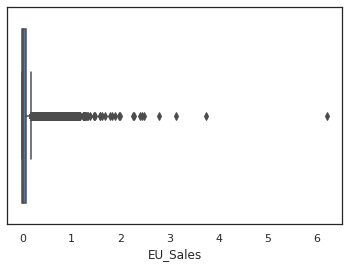

In [ ]:
sns.boxplot(data['EU_Sales'])
plt.show()

In [ ]:
Q1 = np.percentile(data['EU_Sales'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['EU_Sales'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['EU_Sales'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -0.10500000000000001
upper limit: 0.17500000000000002


In [ ]:
data=data[data.EU_Sales<up_lim]
data=data[data.EU_Sales>low_lim]

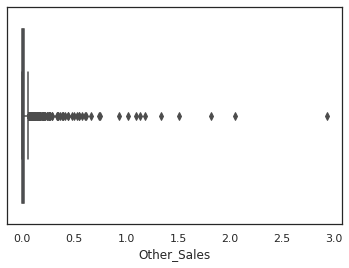

In [ ]:
sns.boxplot(data['Other_Sales'])
plt.show()

In [ ]:
Q1 = np.percentile(data['Other_Sales'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['Other_Sales'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['Other_Sales'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -0.03
upper limit: 0.05


In [ ]:
data=data[data.Other_Sales<up_lim]
data=data[data.Other_Sales>low_lim]

In [ ]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
data.corr()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.012980,-0.094304,0.266530,-0.012443,0.015819,-0.679408,-0.506370,-0.363392,-0.623028,-0.758803
Name,-0.012980,1.000000,-0.000712,-0.013257,-0.004373,-0.000141,0.006023,0.017587,0.003331,0.017785,0.010167
Platform,-0.094304,-0.000712,1.000000,-0.329500,0.078143,-0.001233,0.188693,-0.014367,-0.023409,-0.043878,0.068981
Year,0.266530,-0.013257,-0.329500,1.000000,0.133290,0.000671,-0.158368,-0.068783,-0.210618,0.061939,-0.264104
Genre,-0.012443,-0.004373,0.078143,0.133290,1.000000,-0.007574,0.030135,0.060042,-0.052566,0.030267,-0.017042
Publisher,0.015819,-0.000141,-0.001233,0.000671,-0.007574,1.000000,-0.008281,-0.005445,-0.004637,-0.012077,-0.009573
NA_Sales,-0.679408,0.006023,0.188693,-0.158368,0.030135,-0.008281,1.000000,0.456882,-0.083905,0.586798,0.531621
EU_Sales,-0.506370,0.017587,-0.014367,-0.068783,0.060042,-0.005445,0.456882,1.000000,-0.089518,0.631651,0.356000
JP_Sales,-0.363392,0.003331,-0.023409,-0.210618,-0.052566,-0.004637,-0.083905,-0.089518,1.000000,-0.040346,0.780230
Other_Sales,-0.623028,0.017785,-0.043878,0.061939,0.030267,-0.012077,0.586798,0.631651,-0.040346,1.000000,0.413071


In [ ]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(data,test_size=0.25)

In [ ]:
train_x=train.drop(['Global_Sales'],axis=1)
train_y=train['Global_Sales']
test_x=test.drop(['Global_Sales'],axis=1)
test_y=test['Global_Sales']

In [ ]:
print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of test_x dataframe:',test_x.shape)
print('Dimension of test_y dataframe:',test_y.shape)

Dimension of train_x dataframe: (9214, 10)
Dimension of train_y dataframe: (9214,)
Dimension of test_x dataframe: (3072, 10)
Dimension of test_y dataframe: (3072,)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler
scaler = StandardScaler()
  
# To scale data
scaler.fit(data)
from sklearn.preprocessing import normalize
normalize(data)

array([[1.06357835e-01, 0.00000000e+00, 0.00000000e+00, ...,
        2.40912863e-03, 0.00000000e+00, 2.40912863e-03],
       [1.20612454e-01, 0.00000000e+00, 0.00000000e+00, ...,
        2.03502495e-03, 9.92695098e-06, 2.21867354e-03],
       [1.55528220e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.87329517e-03, 0.00000000e+00, 1.92298470e-03],
       ...,
       [9.92761470e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.98121141e-07],
       [9.92748064e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.98077031e-07],
       [9.92798802e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.98071567e-07]])

In [ ]:
from sklearn.linear_model import LinearRegression
ln_reg= LinearRegression()
ln_reg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln_reg.predict(test_x)
print("Accuracy: ", ln_reg.score(test_x,test_y))
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, test_y))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, test_y))
print('R_Squared Score of linear regression:', r2_score(df_pred, test_y))

Accuracy:  0.99955755441231
Mean Absolute Error of linear regression: 0.0028765547964079
Mean Square Error of linear regression: 2.1954840347225803e-05
R_Squared Score of linear regression: 0.9995568180452803


In [ ]:
import xgboost as xgb

from xgboost import XGBRegressor
from xgboost import plot_importance
xgbl=XGBRegressor()
xgbl.fit(train_x,train_y)
test_pred=xgbl.predict(test_x)
xgbl_score=xgbl.score(test_x,test_y)
print("The XGBoostclassifier model accuracy is {}".format(xgbl_score))


[06:22:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The XGBoostclassifier model accuracy is 0.9986248449725648


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

abcl = AdaBoostRegressor( n_estimators= 20)
abcl = abcl.fit(train_x, train_y)

test_pred = abcl.predict(test_x)
abcl_score=abcl.score(test_x, test_y)
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))


The Adaboost Ensemble model accuracy is 0.9666628323447702
